# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('SalaryByYE.csv')
data.head(5)

,Gender,Years of Experience,Salary
0,Male,5.0,90000.0
1,Female,3.0,65000.0
2,Male,15.0,NaN
3,Female,7.0,60000.0
4,Male,20.0,200000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               6684 non-null   object 
 1   Years of Experience  6684 non-null   float64
 2   Salary               6681 non-null   float64
dtypes: float64(2), object(1)
memory usage: 156.8+ KB


# 1-Handling missing data

In [5]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

Gender                 0
Years of Experience    0
Salary                 3
dtype: int64

In [6]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean["Salary"] = data["Salary"].fillna(data["Salary"].mean())
data_clean.head()

,Gender,Years of Experience,Salary
0,Male,5.0,90000.000000
1,Female,3.0,65000.000000
2,Male,15.0,115297.584044
3,Female,7.0,60000.000000
4,Male,20.0,200000.000000


In [7]:
data_clean.isnull().sum()

Gender                 0
Years of Experience    0
Salary                 0
dtype: int64

# 2-Encoding Categorical Data

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, 2].values
data_clean.drop("Salary",axis=1,inplace = True)
X = data_clean.iloc[:, 0:].values
X.shape

(6684, 2)

In [9]:
X[0]

array(['Male', 5.0], dtype=object)

In [18]:
print(X.shape)

(13580, 13707)


In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X =ct.fit_transform(X)

In [15]:
X = data_clean[['Years of Experience']]

In [16]:
print(X.shape)
print(y.shape)

(6684, 1)
(6684,)


# 3-Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

In [18]:
pd.DataFrame(X_scalled, columns=X.columns).head()

,Years of Experience
0,-0.510499
1,-0.842237
2,1.148191
3,-0.178761
4,1.977536


In [19]:
X.head()

,Years of Experience
0,5.0
1,3.0
2,15.0
3,7.0
4,20.0


# 4-Splitting the dataset into training and test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Simple Liner Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

In [22]:
import sklearn.metrics as sm
Y_pred = lr.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 24831.86
Mean squared error train= 961226080.16
Median absolute error train= 21488.05
Explain variance score train= 0.65
R2 score train= 0.65


In [23]:
Y_pred = lr.predict(X_test)
print("Mean absolute error test =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error test=", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error test=", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score test=", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_test, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error test = 24863.13
Mean squared error test= 936405656.48
Median absolute error test= 22260.63
Explain variance score test= 0.67
R2 score train= 0.67


## Predicting the Test set results

In [26]:
y_pred = lr.predict(X_test)

## Visualising the Training set results

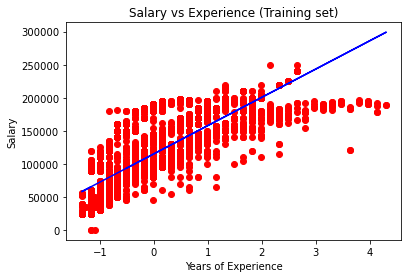

In [28]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

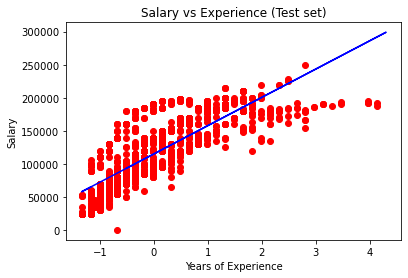

In [29]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()